## Titanic

https://www.kaggle.com/c/titanic/data

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_train.isnull().sum()

PassengerId    0  
Survived       0  
Pclass         0  
Name           0  
Sex            0  
Age            177
SibSp          0  
Parch          0  
Ticket         0  
Fare           0  
Cabin          687
Embarked       2  
dtype: int64

In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#replacing all null valtes with mean
df_train['Age'].fillna(df_train['Age'].mean() , inplace=True)

In [12]:
df_test['Age'].fillna(df_test['Age'].mean() , inplace=True)

In [13]:
df_train['Embarked'].fillna(method ='ffill' , inplace=True)

In [14]:
df_train.drop('Cabin', axis = 1 , inplace = True)

In [15]:
df_test.drop('Cabin', axis = 1 , inplace = True)

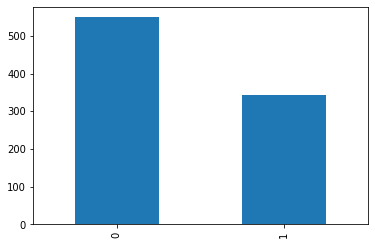

In [16]:
df_train["Survived"].value_counts().plot.bar()
plt.style.use('classic')

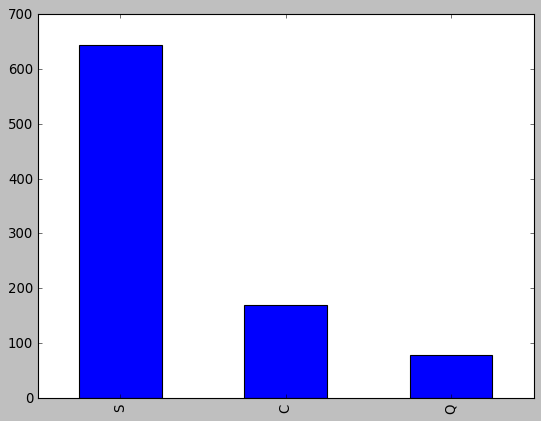

In [17]:
df_train["Embarked"].value_counts().plot.bar()
plt.style.use('classic')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19b34610>,
      dtype=object)

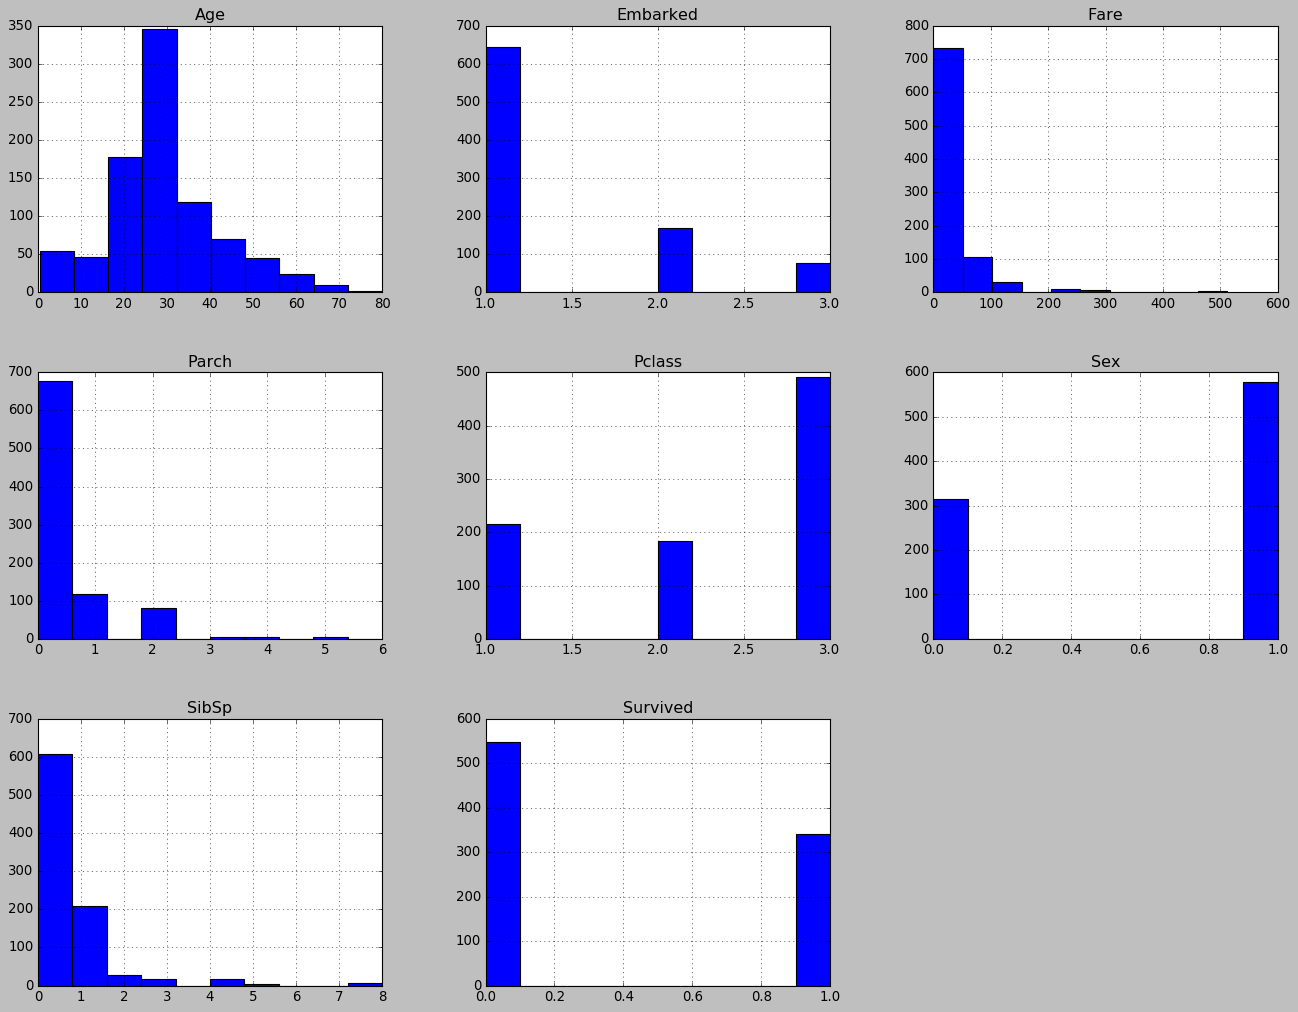

In [63]:
df_train.hist(bins=10, figsize=(20,15))

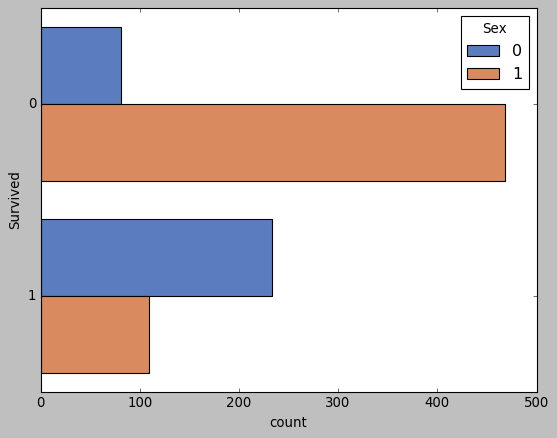

In [64]:
sns.set_palette("muted")
sns.countplot(y="Survived", hue="Sex", data=df_train)
plt.show()

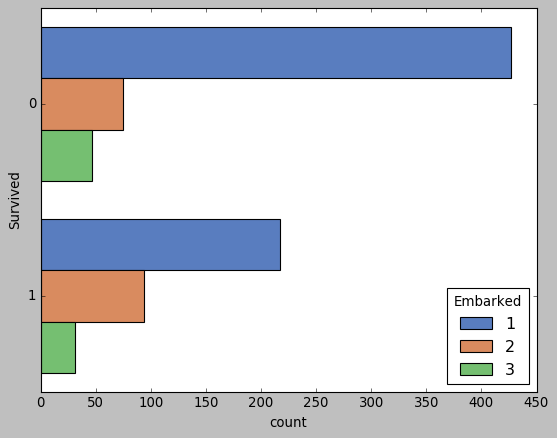

In [65]:
sns.set_palette("muted")
sns.countplot(y="Survived", hue="Embarked", data=df_train)
plt.show()

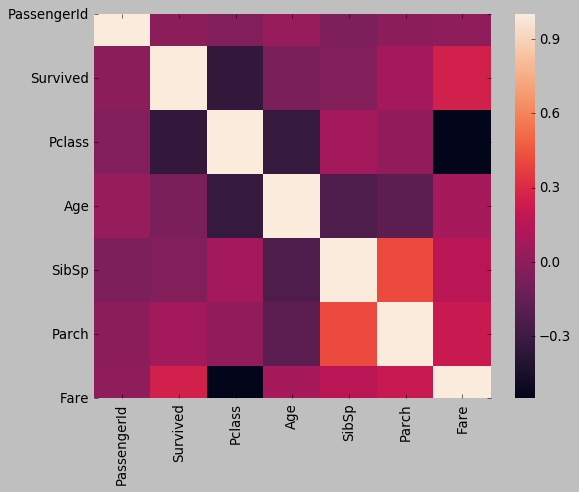

In [18]:
corr = df_train.corr()
sns.heatmap(corr)

In [19]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


- Pclass and survived , age , fare  are all corelated


In [20]:
np.random.seed(45)
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [21]:
df_train.drop('Name', axis = 1 , inplace = True)

In [22]:
df_train.drop('PassengerId', axis = 1 , inplace = True)

In [23]:
df_test.drop('Name', axis = 1 , inplace = True)

In [24]:
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})

In [25]:
df_test['Sex'] = df_test['Sex'].map({'male': 1, 'female': 0})

In [26]:
df_train['Embarked'].value_counts()

S    644
C    169
Q    78 
Name: Embarked, dtype: int64

In [27]:
df_train.drop('Ticket', axis = 1 , inplace = True)

In [28]:
df_test.drop('Ticket', axis = 1 , inplace = True)

In [29]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [30]:
df_test['Embarked'] = df_test['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [33]:
X = df_train.drop('Survived', axis = 1)

In [34]:
y = df_train['Survived'].copy()

In [35]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df_train['Survived'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
clf_logreg = LogisticRegression()
clf_logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
pred_logreg = clf_logreg.predict(X_test)
accuracy_score(pred_logreg,y_test)

0.7877094972067039

In [39]:
print(confusion_matrix(y_test, pred_logreg))

[[89 16]
 [22 52]]


In [40]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
pred_dt = clf_dt.predict(X_test)
accuracy_score(pred_dt,y_test)

0.7877094972067039

In [42]:
print(confusion_matrix(y_test, pred_dt))

[[86 19]
 [19 55]]


In [43]:
clf_svc = SVC()
clf_svc.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
pred_svc = clf_svc.predict(X_test)
accuracy_score(pred_svc,y_test)

0.6759776536312849

In [45]:
print(confusion_matrix(y_test, pred_svc))

[[91 14]
 [44 30]]


In [46]:
clf_sgd = SGDClassifier(penalty=None)
clf_sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
pred_sgd = clf_sgd.predict(X_test)
accuracy_score(pred_sgd,y_test)

0.776536312849162

In [48]:
print(confusion_matrix(y_test, pred_sgd))

[[80 25]
 [15 59]]


In [49]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,3
1,893,3,0,47.0,1,0,7.0000,1
2,894,2,1,62.0,0,0,9.6875,3
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,1


In [50]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [51]:
#set ids as PassengerId and predict survival 
Pid = df_test['PassengerId']

In [52]:
Pid

0      892 
1      893 
2      894 
3      895 
4      896 
      ...  
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [53]:
test_pred = df_test.drop('PassengerId', axis=1,inplace = True)

In [54]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,3
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,3
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [55]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [56]:
df_test['Fare'] = df_test['Fare'].round(2)

In [57]:
df_test['Age'] = df_test['Age'].round(2)

In [58]:
df_test['Fare'].fillna(df_test['Fare'].mean() , inplace=True)

In [59]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [60]:
predict = clf_logreg.predict(df_test)

In [61]:
#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : Pid, 'Survived': predict })
output.to_csv('submission.csv', index=False)

In [62]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
